<h1 style="font-size: 50px; color: lightblue; text-align:center; font-weight: bolder;"> Strategy 2: SMA Crossover Strategy </h1>


<br>

<!-- Add font awesome icons -->
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/css/all.min.css" />
<script src="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/js/all.min.js"></script>

<!-- Contents -->
<a id="index" style="font-size: 28px; color: lightblue; font-weight:bolder; text-decoration: none;">Contents</a>
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<a href="#1" style="color:#033a91; font-size: 22px; text-decoration: none; font-weight:bold;">1. Importing data and libraries</a>

<a href="#2" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;">2. Time Series Exploration</a>
<ul style="color: #033a91">
    <li><a href="#2.1" style="color: #033a91; text-decoration: none;"> 2.1 SPDR Return Time Series</a></li>
  <li><a href="#2.2" style="color: #033a91; text-decoration: none;">2.2 EFFR Time Series</a></li>
  <li><a href="#2.3" style="color: #033a91; text-decoration: none;">2.3 Daily Excess Return Time Series</a></li>
</ul>

<a href="#3" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;">3. Crossover Strategy</a>
<ul style="color: #033a91">
    <li><a href="#3.1" style="color: #033a91; text-decoration: none;">3.1 Crossover Strategy 1 with 60 days short MA and 130 days long MA</a></li>
  <li><a href="#3.2" style="color: #033a91; text-decoration: none;">3.2 Crossover Strategy 2 with 70 days short MA and 150 days long MA</a></li>
</ul>

<a href="#4" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;">4. Model Comparison</a>
<ul style="color: #033a91">
    <li><a href="#4.1" style="color: #033a91; text-decoration: none;">4.1 Position of Strategies Plot</a></li>
  <li><a href="#4.2" style="color: #033a91; text-decoration: none;">4.2 Turnover Dollars and Turnover Units</a></li>
    <li><a href="#4.3" style="color: #033a91; text-decoration: none;">4.3 Daily Trading PnL Plot</a></li>
    <li><a href="#4.4" style="color: #033a91; text-decoration: none;">4.4 Cumulative Trading PnL Plot</a></li>
    <li><a href="#4.5" style="color: #033a91; text-decoration: none;">4.5 Daily Cash Growth Plot</a></li>
    <li><a href="#4.6" style="color: #033a91; text-decoration: none;">4.6 Cumulative Cash Growth Plot</a></li>
    <li><a href="#4.7" style="color: #033a91; text-decoration: none;">4.7 Daily Total PnL Plot</a></li>
    <li><a href="#4.8" style="color: #033a91; text-decoration: none;">4.8 Cumulative Total PnL Plot</a></li>
    <li><a href="#4.9" style="color: #033a91; text-decoration: none;">4.9 Sharpe Ratio</a></li>
    <li><a href="#4.10" style="color: #033a91; text-decoration: none;">4.10 Sortino Ratio</a></li>
    <li><a href="#4.11" style="color: #033a91; text-decoration: none;">4.11 Maximum Drawdown</a></li>
    <li><a href="#4.12" style="color: #033a91; text-decoration: none;">4.12 Calmar Ratio</a></li>
    <li><a href="#4.13" style="color: #033a91; text-decoration: none;">4.13 Drawdown Chart and 90-day stock volatility</a></li>
    <li><a href="#4.14" style="color: #033a91; text-decoration: none;">4.14 Plot of 3 strategies' avg. excess returns and spdr avg. excess return against their std. deviations - <strong>In Strategy 1 Code</strong></a></li>
</ul>



<br id="1">
<a href="#index" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;"> 1. Importing data and libraries </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">

In [7]:
!pip install fredapi

In [79]:
!pip install pmdarima

     |████████████████████████████████| 608 kB 1.7 MB/s eta 0:00:01


In [1]:
import yfinance as yf
import datetime as dt
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<br id="2">
<a href="#index" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;"> 2. Time Series Exploration </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">


In [2]:
start_date = dt.datetime(2014, 1, 1)
end_date = dt.datetime(2019, 12, 31)
symbol = "SPY"

spy = yf.download(symbol, start=start_date, end=end_date)

spy["spdr_return"] = spy["Close"].pct_change()

[*********************100%***********************]  1 of 1 completed


In [3]:
spy #our focus is on closing prices

,Open,High,Low,Close,Adj Close,Volume,spdr_return
Date,,,,,,,
2014-01-02 00:00:00-05:00,183.979996,184.070007,182.479996,182.919998,154.400208,119636900,NaN
2014-01-03 00:00:00-05:00,183.229996,183.600006,182.630005,182.889999,154.374954,81390600,-0.000164
2014-01-06 00:00:00-05:00,183.490005,183.559998,182.080002,182.360001,153.927536,108028200,-0.002898
2014-01-07 00:00:00-05:00,183.089996,183.789993,182.949997,183.479996,154.872925,86144200,0.006142
2014-01-08 00:00:00-05:00,183.449997,183.830002,182.889999,183.520004,154.906708,96582300,0.000218
...,...,...,...,...,...,...,...
2019-12-23 00:00:00-05:00,321.589996,321.649994,321.059998,321.220001,305.051178,52990000,0.001528
2019-12-24 00:00:00-05:00,321.470001,321.519989,320.899994,321.230011,305.060699,20270000,0.000031
2019-12-26 00:00:00-05:00,321.649994,322.950012,321.640015,322.940002,306.684540,30911200,0.005323


In [4]:
fred = Fred(api_key='81ae65057a007cf1c90c74a5deef3d3d')

In [5]:
fred

In [6]:
start_date = '2014-01-01'
end_date = '2019-12-31'
effr_name = 'EFFR'

effr = fred.get_series(effr_name, start_date, end_date)

#make EFFR a daily risk-free rate (in decimals rather than percentage)
effr = effr/25200 

#convert to a df in order to perform merging later
effr_data = pd.DataFrame(effr, columns=['effr_rate'])
effr_data.index.rename('date', inplace=True)
effr_data

# Convert index of spy DataFrame to timezone-aware
spy.index = pd.to_datetime(spy.index).tz_localize(effr_data.index.tz)

In [7]:
missing_values = effr.isna().sum()
print(missing_values)

58


In [8]:
# Filling missing values in effr_data with ffill
effr_data = effr_data.ffill()

In the context of economics and finance, filling missing values with ffill (forward fill) makes sense when we expect that the missing values are not significant departures from the underlying trend of the data. In other words, if we believe that the missing values are simply due to missing data points, and not due to any major shocks or structural changes in the economy, then it is reasonable to assume that the missing values are similar to the preceding values and can be filled using ffill.

In the case of the EFFR rate, which is the interest rate at which banks lend and borrow funds overnight from each other, it is generally expected to remain relatively stable over short periods of time. Therefore, filling missing values with ffill is reasonable, assuming that missing values are due to missing data points and not significant shocks or structural changes in the financial system. ALSO, we only have first row as NaN as ffil needs the closing price of the working day before 2014-01-01 which is not present in the data

In [9]:
merged_data = pd.merge(spy, effr_data, how="left", left_index = True, right_index = True)

# Calculate excess return
merged_data['excess_return'] = merged_data['Close'].pct_change() - merged_data['effr_rate']

#we only have one missing values which is the first row as pct change needs the previous closing price which has
#already been eliminated using left join
merged_data['excess_return'].isna().sum() #value is 1

#so we remove the first row
merged_data.drop(index=merged_data.index[0], inplace=True)
merged_data

,Open,High,Low,Close,Adj Close,Volume,spdr_return,effr_rate,excess_return
Date,,,,,,,,,
2014-01-03,183.229996,183.600006,182.630005,182.889999,154.374954,81390600,-0.000164,0.000003,-0.000167
2014-01-06,183.490005,183.559998,182.080002,182.360001,153.927536,108028200,-0.002898,0.000003,-0.002901
2014-01-07,183.089996,183.789993,182.949997,183.479996,154.872925,86144200,0.006142,0.000003,0.006139
2014-01-08,183.449997,183.830002,182.889999,183.520004,154.906708,96582300,0.000218,0.000003,0.000215
2014-01-09,184.110001,184.130005,182.800003,183.639999,155.007980,90683400,0.000654,0.000003,0.000651
...,...,...,...,...,...,...,...,...,...
2019-12-23,321.589996,321.649994,321.059998,321.220001,305.051178,52990000,0.001528,0.000062,0.001466
2019-12-24,321.470001,321.519989,320.899994,321.230011,305.060699,20270000,0.000031,0.000062,-0.000030
2019-12-26,321.649994,322.950012,321.640015,322.940002,306.684540,30911200,0.005323,0.000062,0.005262


<br id="2.1">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">  2.1 SPDR Return Time Series <a>

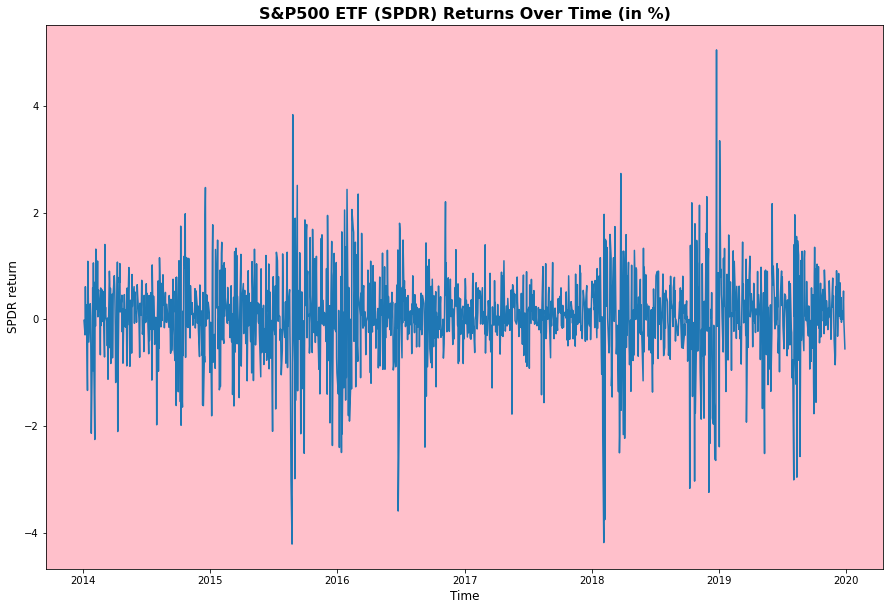

In [10]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(merged_data["spdr_return"]*100)
ax.set_facecolor("pink")
ax.set_title('S&P500 ETF (SPDR) Returns Over Time (in %)',fontsize=16,weight='bold')
ax.set_xlabel("Time",fontsize=12)
ax.set_ylabel("SPDR return",fontsize=12)

plt.show()

<br id="2.2">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;"> 2.2 EFFR Time Series </a>

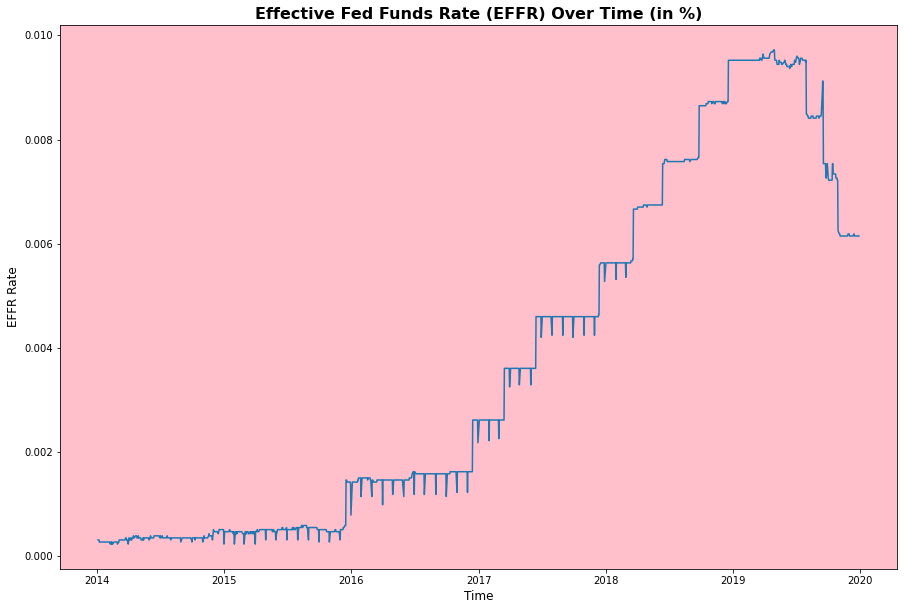

In [11]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(merged_data["effr_rate"]*100)
ax.set_facecolor("pink")
ax.set_title('Effective Fed Funds Rate (EFFR) Over Time (in %)',fontsize=16,weight='bold')
ax.set_xlabel("Time",fontsize=12)
ax.set_ylabel("EFFR Rate",fontsize=12)

plt.show()

<br id="2.3">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;"> 2.3 Daily Excess Return Time Series</a>

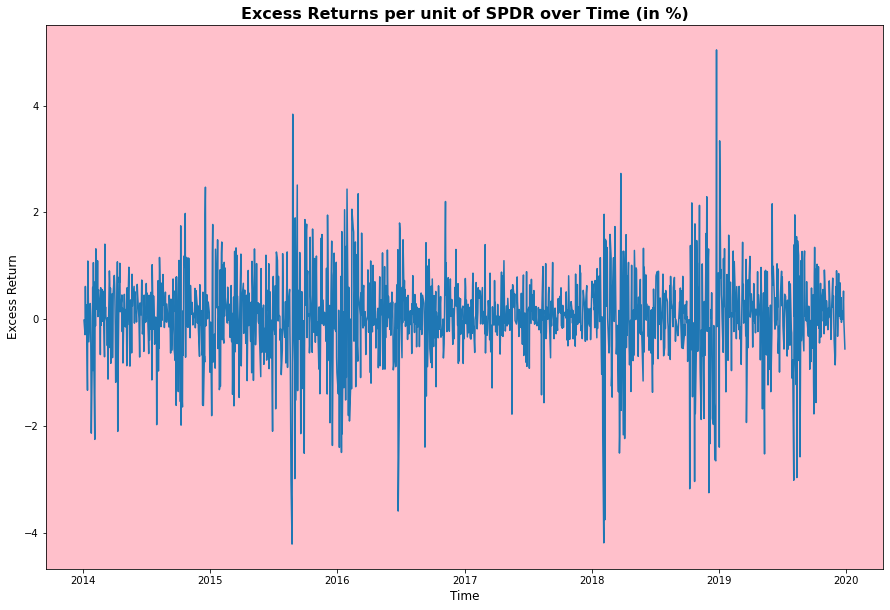

In [96]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(merged_data["excess_return"]*100)
ax.set_facecolor("pink")
ax.set_title('Excess Returns per unit of SPDR over Time (in %)',fontsize=16,weight='bold')
ax.set_xlabel("Time",fontsize=12)
ax.set_ylabel("Excess Return",fontsize=12)

plt.show()

In [13]:
i = 0
negative = [i for i in list(merged_data["excess_return"]) if i<0]
print(len(negative))

#So, almost half of the excess return values are negative, which is a realistic random scenario

687


## **RULES:** 

#### 1. spdr_return is the rate that we borrow at the end of trading period on day i and sell it at the end of trading period on day (i+1) 
#### 2. For each strategy, we apply the 60/40 portfolio rule which means investing 60% of the capital in stocks and 40% in the bond & money market.
#### 3. No stock investments are made within the first time_window period due to our calculation of MA(time_window). We don't invest without prior and clear knowledge about the behaviour of the price using moving averages metric, leading us to make this decision. So, the whole total of 200,000 will be taken as unused capital, increased by the risk-free rate for initial time_window period.
#### 4. total_capital[i] (or V_total[i]) is the total amount of money accumulated before the the announcement of closing price on day i
#### 5. trading_capital[i] and unused_capital[i] are the amounts invested after the announcement of closing price on day i
#### 6. cum_trad_PnL[i+1], cum_total_PnL[i+1] and cum_cash_growth[i+1] are calculated on i+1_th day when the trading PnL and cash growth has been calculated just when closing the position on day i+1 since investing on day i
#### 7. All other quantities apart from these represent the values after investment made based on closing price of day i

<br id="3">
<a href="#index" style="color:#033a91; font-size: 22px; text-decoration: none; font-weight:bold;"> 3. Crossover Strategy  </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">


In [14]:
price = merged_data["Close"]  # [0:1056] nearly 70% of the data
n = len(price)
riskfree = merged_data["effr_rate"]

In [97]:
unused_capital1 = np.zeros(np.shape(price))
daily_cash_growth1 = np.zeros(np.shape(price))
daily_trad_PnL1 = np.zeros(np.shape(price))
daily_total_PnL1 = np.zeros(np.shape(price))
total_capital1 = np.zeros(np.shape(price))
trading_capital1 = np.zeros(np.shape(price))
residual_capital1 = np.zeros(np.shape(price))
units1 = np.zeros(np.shape(price))
theta1 = np.zeros(np.shape(price))
position1 = np.zeros(np.shape(price))
cum_trad_PnL1 = np.zeros(np.shape(price)) 
cum_total_PnL1 = np.zeros(np.shape(price)) 
cum_cash_growth1 = np.zeros(np.shape(price))

#total_capital[i] (or V_total[i]) is the total amount of money accumulated before the the announcement of closing price on day i

#trading_capital[i] and unused_capital[i] are the amounts invested after the announcement of closing price on day i

#All other quantities apart from these three represent the values after investment made based on closing price of day i 

list_tradcapital = list()
list_totcapital = list()

stock_cash_split = 0.6 #60 - 40 portfolio strategy 
L = 5
total_capital1[0] = 200000

for time_window in range(10, 101, 10):
    MA1 = merged_data["Close"].rolling(window = time_window).mean()
    for gap_days in range(10,131,10):
        time_window2 = time_window+gap_days
        MA2 = merged_data["Close"].rolling(window = time_window2).mean()

        for i in range(n-1): 

            #We do not make the investment within the first time_window period due to our calculation of MA(time_window)
            #So, the whole total of 200,000 will be invested as unused capital, increased by the risk-free rate
            #over that period. 

            if i<time_window2:        
                unused_capital1[i] = total_capital1[i]
                daily_cash_growth1[i] = unused_capital1[i] * riskfree[i]   
                daily_trad_PnL1[i] = 0
                daily_total_PnL1[i] = daily_cash_growth1[i] + daily_trad_PnL1[i]
                total_capital1[i+1] = total_capital1[i] + daily_total_PnL1[i] 
                cum_cash_growth1[i+1] = cum_cash_growth1[i] + daily_cash_growth1[i]
                cum_total_PnL1[i+1] = cum_total_PnL1[i] + daily_total_PnL1[i]

                #there's no cum_trad_PnL as we don't make trades for first time_window days

            if i>=time_window2:

                if MA1[i] > MA2[i]:            
                    position1[i] = 1

                elif MA1[i] < MA2[i]:
                    position1[i] = -1

                trading_capital1[i] = stock_cash_split*total_capital1[i] # 60% of total available money is availed for stocks
                units1[i] = position1[i]*np.floor(trading_capital1[i]*L/price[i]) #long and short "whole" stocks

                #we now check with the given constraints 
                theta1[i]=units1[i]*price[i] 

                if(abs(theta1[i])<=trading_capital1[i]*L):     
                    theta1[i]=units1[i]*price[i]
                else:
                    theta1[i]=position1[i]*trading_capital1[i]*L

                #Calculating daily trading PnL
                daily_trad_PnL1[i] = merged_data["excess_return"][i+1]*theta1[i]
                cum_trad_PnL1[i+1] = cum_trad_PnL1[i] + daily_trad_PnL1[i] 

                #Calculating daily cash growth
                residual_capital1[i] = trading_capital1[i] - abs(theta1[i])/L
                unused_capital1[i] = (1-stock_cash_split)*total_capital1[i] + residual_capital1[i]
                daily_cash_growth1[i] = unused_capital1[i] * riskfree[i] 
                cum_cash_growth1[i+1] = cum_cash_growth1[i] + daily_cash_growth1[i]

                #Calculating daily total PnL
                daily_total_PnL1[i] = daily_cash_growth1[i] + daily_trad_PnL1[i]
                cum_total_PnL1[i] = cum_total_PnL1[i-1] + daily_total_PnL1[i]
                total_capital1[i+1] = total_capital1[i] + daily_total_PnL1[i]

        print(time_window, time_window2, trading_capital1[n-2], total_capital1[n-1])
        list_tradcapital.append(trading_capital1[n-2])
        list_totcapital.append(total_capital1[n-1]) 


10 20 24640.605774532938 40382.94345998532
10 30 48399.99687475937 79320.55523594
10 40 44991.739296048305 73735.37947942052
10 50 40865.134485250725 66972.7268141287
10 60 60523.00593250392 99187.69326380492
10 70 69203.62631697602 113414.57070758042
10 80 77444.24750113419 126918.89401862102
10 90 82996.92965588975 136018.80421270375
10 100 111576.40610291636 182856.90234900513
10 110 85084.92792729009 139441.29285367182
10 120 72699.68477419834 119144.28643344906
10 130 66059.91102324805 108261.30673384416
10 140 78721.8734878331 129012.32505826122
20 30 62531.4798834694 102479.43704734123
20 40 52935.895494431825 86754.58323385952
20 50 98564.18443515079 161531.10192435788
20 60 90944.04706609386 149042.94362374046
20 70 47112.696862297205 77210.99982831214
20 80 57354.3509482738 93994.66441150465
20 90 64000.76628874688 104886.91027891057
20 100 51807.045327961656 84903.71565932686
20 110 51599.53782331803 84563.26003275334
20 120 52850.587540229826 86614.19839391687
20 130 66285.

On the basis of the values obtained above, we believe that 60 days shortMA, 130 days longMA and 70 shortMA, 150 longMA could be our best options. But to select the one best, we need to calculate the technical indicators such as Sharpe Ratio, Sortino Ratio, etc.

<br id="3.1">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;"> 3.1 Crossover Strategy 1 with 60 days short MA and 130 days long MA </a>

In [147]:
time_window = 60
time_window2 = 130
MA1 = merged_data["Close"].rolling(window = time_window).mean()
MA2 = merged_data["Close"].rolling(window = time_window2).mean()


unused_capital1 = np.zeros(np.shape(price))
daily_cash_growth1 = np.zeros(np.shape(price))
daily_trad_PnL1 = np.zeros(np.shape(price))
daily_total_PnL1 = np.zeros(np.shape(price))
total_capital1 = np.zeros(np.shape(price))
trading_capital1 = np.zeros(np.shape(price))
residual_capital1 = np.zeros(np.shape(price))
units1 = np.zeros(np.shape(price))
theta1 = np.zeros(np.shape(price))
position1 = np.zeros(np.shape(price))
cum_trad_PnL1 = np.zeros(np.shape(price)) 
cum_total_PnL1 = np.zeros(np.shape(price)) 
cum_cash_growth1 = np.zeros(np.shape(price))
unit_turnover1 = np.zeros(np.shape(price))
dollar_turnover1 = np.zeros(np.shape(price))

#total_capital[i] (or V_total[i]) is the total amount of money accumulated before the the announcement of closing price on day i

#trading_capital[i] and unused_capital[i] are the amounts invested after the announcement of closing price on day i

#All other quantities apart from these three represent the values after investment made based on closing price of day i 

stock_cash_split = 0.6 #60 - 40 portfolio strategy 
L = 5
total_capital1[0] = 200000


for i in range(n-1): 

    #We do not make the investment within the first time_window period due to our calculation of MA(time_window)
    #So, the whole total of 200,000 will be invested as unused capital, increased by the risk-free rate
    #over that period. 

    if i<time_window2:        
        unused_capital1[i] = total_capital1[i]
        daily_cash_growth1[i] = unused_capital1[i] * riskfree[i]   
        daily_trad_PnL1[i] = 0
        daily_total_PnL1[i] = daily_cash_growth1[i] + daily_trad_PnL1[i]
        total_capital1[i+1] = total_capital1[i] + daily_total_PnL1[i] 
        cum_cash_growth1[i+1] = cum_cash_growth1[i] + daily_cash_growth1[i]
        cum_total_PnL1[i+1] = cum_total_PnL1[i] + daily_total_PnL1[i]

        #there's no cum_trad_PnL as we don't make trades for first time_window days

    if i>=time_window2:

        if MA1[i] > MA2[i]:            
            position1[i] = 1

        elif MA1[i] < MA2[i]:
            position1[i] = -1

        trading_capital1[i] = stock_cash_split*total_capital1[i] # 60% of total available money is availed for stocks
        units1[i] = position1[i]*np.floor(trading_capital1[i]*L/price[i]) #long and short "whole" stocks
        unit_turnover1[i] = abs(units1[i] - units1[i-1])
        print(units1[i],units1[i-1],unit_turnover1[i])

        #we now check with the given constraints 
        theta1[i]=units1[i]*price[i] 

        if(abs(theta1[i])<=trading_capital1[i]*L):     
            theta1[i]=units1[i]*price[i]
        else:
            theta1[i]=position1[i]*trading_capital1[i]*L
        
        dollar_turnover1[i] = abs(theta1[i] - theta1[i-1])
        print(theta1[i],theta1[i-1],dollar_turnover1[i])

        #Calculating daily trading PnL
        daily_trad_PnL1[i] = merged_data["excess_return"][i+1]*theta1[i]
        cum_trad_PnL1[i+1] = cum_trad_PnL1[i] + daily_trad_PnL1[i] 

        #Calculating daily cash growth
        residual_capital1[i] = trading_capital1[i] - abs(theta1[i])/L
        unused_capital1[i] = (1-stock_cash_split)*total_capital1[i] + residual_capital1[i]
        daily_cash_growth1[i] = unused_capital1[i] * riskfree[i] 
        cum_cash_growth1[i+1] = cum_cash_growth1[i] + daily_cash_growth1[i]

        #Calculating daily total PnL
        daily_total_PnL1[i] = daily_cash_growth1[i] + daily_trad_PnL1[i]
        cum_total_PnL1[i] = cum_total_PnL1[i-1] + daily_total_PnL1[i]
        total_capital1[i+1] = total_capital1[i] + daily_total_PnL1[i]

3053.0 0.0 3053.0
600250.3318634033 0.0 600250.3318634033
3083.0 3053.0 30.0
609200.8188171387 600250.3318634033 8950.486953735352
3071.0 3083.0 12.0
605693.3168792725 609200.8188171387 3507.501937866211
3094.0 3071.0 23.0
612488.2607727051 605693.3168792725 6794.943893432617
3023.0 3094.0 71.0
591631.3502960205 612488.2607727051 20856.91047668457
3084.0 3023.0 61.0
609737.6607055664 591631.3502960205 18106.3104095459
3072.0 3084.0 12.0
606228.46875 609737.6607055664 3509.1919555664062
3099.0 3072.0 27.0
614221.7905426025 606228.46875 7993.321792602539
3113.0 3099.0 14.0
618366.3180999756 614221.7905426025 4144.527557373047
3113.0 3113.0 0.0
618397.4309997559 618366.3180999756 31.112899780273438
3084.0 3113.0 29.0
609768.4837646484 618397.4309997559 8628.947235107422
3086.0 3084.0 2.0
610410.8094177246 609768.4837646484 642.3256530761719
3060.0 3086.0 26.0
602666.9906616211 610410.8094177246 7743.818756103516
3060.0 3060.0 0.0
602758.7869262695 602666.9906616211 91.7962646484375
2937.0

3402.0 3384.0 18.0
720951.833770752 715242.2420654297 5709.591705322266
3344.0 3402.0 58.0
702674.736328125 720951.833770752 18277.097442626953
3332.0 3344.0 12.0
698953.6542358398 702674.736328125 3721.0820922851562
3291.0 3332.0 41.0
686107.665939331 698953.6542358398 12845.988296508789
3290.0 3291.0 1.0
685800.4899597168 686107.665939331 307.1759796142578
3368.0 3290.0 78.0
710479.5897216797 685800.4899597168 24679.09976196289
3389.0 3368.0 21.0
717214.0865478516 710479.5897216797 6734.496826171875
3337.0 3389.0 52.0
700803.3516693115 717214.0865478516 16410.73487854004
3308.0 3337.0 29.0
691735.882019043 700803.3516693115 9067.469650268555
3344.0 3308.0 36.0
703076.0 691735.882019043 11340.117980957031
3355.0 3344.0 11.0
706529.437713623 703076.0 3453.437713623047
3424.0 3355.0 69.0
728558.7158203125 706529.437713623 22029.278106689453
3360.0 3424.0 64.0
708321.591796875 728558.7158203125 20237.1240234375
3394.0 3360.0 34.0
719154.6579284668 708321.591796875 10833.066131591797
3399

2050.0 2058.0 8.0
430171.9924926758 432673.93130493164 2501.9388122558594
2058.0 2050.0 8.0
432735.6687927246 430171.9924926758 2563.676300048828
2071.0 2058.0 13.0
436794.6175842285 432735.6687927246 4058.9487915039062
2058.0 2071.0 13.0
432756.23748779297 436794.6175842285 4038.380096435547
2079.0 2058.0 21.0
439396.662689209 432756.23748779297 6640.425201416016
2085.0 2079.0 6.0
441352.7847290039 439396.662689209 1956.1220397949219
2099.0 2085.0 14.0
445764.61975097656 441352.7847290039 4411.835021972656
2093.0 2099.0 6.0
443883.44383239746 445764.61975097656 1881.1759185791016
2053.0 2093.0 40.0
431273.7250366211 443883.44383239746 12609.718795776367
2021.0 2053.0 32.0
421277.44383239746 431273.7250366211 9996.281204223633
2013.0 2021.0 8.0
418784.50648498535 421277.44383239746 2492.9373474121094
2007.0 2013.0 6.0
416954.25 418784.50648498535 1830.2564849853516
2019.0 2007.0 12.0
420699.02014160156 416954.25 3744.7701416015625
1983.0 2019.0 36.0
409529.16847229004 420699.0201416015

2209.0 2200.0 9.0
487261.2240447998 484329.9865722656 2931.2374725341797
2211.0 2209.0 2.0
487967.6932525635 487261.2240447998 706.4692077636719
2227.0 2211.0 16.0
493325.0495147705 487967.6932525635 5357.356262207031
2206.0 2227.0 21.0
486378.8705749512 493325.0495147705 6946.178939819336
2215.0 2206.0 9.0
489315.65811157227 486378.8705749512 2936.7875366210938
2204.0 2215.0 11.0
485717.53076171875 489315.65811157227 3598.1273498535156
2188.0 2204.0 16.0
480419.1760253906 485717.53076171875 5298.354736328125
2190.0 2188.0 2.0
481099.18395996094 480419.1760253906 680.0079345703125
2216.0 2190.0 26.0
489736.0 481099.18395996094 8636.816040039062
2230.0 2216.0 14.0
494390.9931945801 489736.0 4654.993194580078
2287.0 2230.0 57.0
513660.21395874023 494390.9931945801 19269.220764160156
2298.0 2287.0 11.0
517394.6859741211 513660.21395874023 3734.4720153808594
2326.0 2298.0 28.0
526862.2472229004 517394.6859741211 9467.561248779297
2320.0 2326.0 6.0
524900.0 526862.2472229004 1962.2472229003

3011.0 3015.0 4.0
791019.7842712402 792553.0352783203 1533.2510070800781
3063.0 3011.0 52.0
811725.6599121094 791019.7842712402 20705.87564086914
3050.0 3063.0 13.0
806602.9739379883 811725.6599121094 5122.685974121094
3042.0 3050.0 8.0
803513.9245605469 806602.9739379883 3089.0493774414062
3020.0 3042.0 22.0
794833.8073730469 803513.9245605469 8680.1171875
3020.0 3020.0 0.0
794984.7705078125 794833.8073730469 150.963134765625
3039.0 3020.0 19.0
802508.7522583008 794984.7705078125 7523.981750488281
3072.0 3039.0 33.0
815646.75 802508.7522583008 13137.997741699219
3090.0 3072.0 18.0
822897.8924560547 815646.75 7251.1424560546875
3100.0 3090.0 10.0
827017.9962158203 822897.8924560547 4120.103759765625
3099.0 3100.0 1.0
826658.25 827017.9962158203 359.7462158203125
3073.0 3099.0 26.0
816373.1912536621 826658.25 10285.05874633789
3092.0 3073.0 19.0
824048.9501953125 816373.1912536621 7675.758941650391
3131.0 3092.0 39.0
839734.2382202148 824048.9501953125 15685.288024902344
3106.0 3131.0 2

-3072.0 -3174.0 102.0
-838993.875 -859836.5806274414 20842.705627441406
-2970.0 -3072.0 102.0
-817997.4398803711 -838993.875 20996.435119628906
-2865.0 -2970.0 105.0
-796183.4825134277 -817997.4398803711 21813.95736694336
2824.0 -2865.0 5689.0
787613.5827636719 -796183.4825134277 1583797.0652770996
2782.0 2824.0 42.0
770224.4792480469 787613.5827636719 17389.103515625
2832.0 2782.0 50.0
791175.826171875 770224.4792480469 20951.346923828125
2836.0 2832.0 4.0
792917.2296142578 791175.826171875 1741.4034423828125
2830.0 2836.0 6.0
790532.1896362305 792917.2296142578 2385.0399780273438
2852.0 2830.0 22.0
799900.4434814453 790532.1896362305 9368.253845214844
2864.0 2852.0 12.0
804955.8330078125 799900.4434814453 5055.3895263671875
2841.0 2864.0 23.0
795480.0 804955.8330078125 9475.8330078125
2834.0 2841.0 7.0
792613.0992431641 795480.0 2866.9007568359375
2844.0 2834.0 10.0
796888.8347167969 792613.0992431641 4275.7354736328125
2872.0 2844.0 28.0
808783.8779296875 796888.8347167969 11895.043

2218.0 2180.0 38.0
628581.1864624023 612274.7680664062 16306.418395996094
2243.0 2218.0 25.0
639389.5745239258 628581.1864624023 10808.388061523438
2284.0 2243.0 41.0
657106.8278808594 639389.5745239258 17717.253356933594
2254.0 2284.0 30.0
644283.3517456055 657106.8278808594 12823.476135253906
2223.0 2254.0 31.0
631220.8771362305 644283.3517456055 13062.474609375
2262.0 2223.0 39.0
648085.6420898438 631220.8771362305 16864.76495361328
2248.0 2262.0 14.0
642096.2509765625 648085.6420898438 5989.39111328125
2192.0 2248.0 56.0
618450.912109375 642096.2509765625 23645.3388671875
2201.0 2192.0 9.0
622398.7773132324 618450.912109375 3947.865203857422
2159.0 2201.0 42.0
604843.8368225098 622398.7773132324 17554.940490722656
2130.0 2159.0 29.0
592715.0765991211 604843.8368225098 12128.760223388672
2141.0 2130.0 11.0
597403.2273864746 592715.0765991211 4688.150787353516
2082.0 2141.0 59.0
573112.1171264648 597403.2273864746 24291.110260009766
2071.0 2082.0 11.0
568634.485168457 573112.11712646

In [148]:
total_capital1[n-1]

286213.68783033115

In [123]:
merged_data["Theta1"] = theta1
theta1 = merged_data["Theta1"][:-1]

merged_data["Trading Capital1"] = trading_capital1 
trading_capital1 = merged_data["Trading Capital1"][:-1]

merged_data["Daily_cash_growth1"] = daily_cash_growth1
daily_cash_growth1 = merged_data["Daily_cash_growth1"][:-1]

merged_data["Daily_trading_PnL1"] = daily_trad_PnL1
daily_trad_PnL1 = merged_data["Daily_trading_PnL1"][:-1]

merged_data["Daily_total_PnL1"] = daily_total_PnL1
daily_total_PnL1 = merged_data["Daily_total_PnL1"][:-1]

merged_data["Total_capital1"] = total_capital1
total_capital1 = merged_data["Total_capital1"][:-1]

merged_data["Stocks_Purchased1"] = units1
units1 = merged_data["Stocks_Purchased1"][:-1]

merged_data["Cumulative_cash_growth1"] = cum_cash_growth1
cum_cash_growth1 = merged_data["Cumulative_cash_growth1"][:-1]

merged_data["Cumulative_trading_PnL1"] = cum_trad_PnL1
cum_trad_PnL1 = merged_data["Cumulative_trading_PnL1"][:-1]

merged_data["Cumulative_total_PnL1"] = cum_total_PnL1
cum_total_PnL1 = merged_data["Cumulative_total_PnL1"][:-1]

<br id="3.2">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;"> 3.2 Crossover Strategy 2 with 70 days short MA and 150 days long MA</a>

In [124]:
time_window_ = 70
time_window2_ = 150
MA1_ = merged_data["Close"].rolling(window = time_window_).mean()
MA2_ = merged_data["Close"].rolling(window = time_window2_).mean()


unused_capital2 = np.zeros(np.shape(price))
daily_cash_growth2 = np.zeros(np.shape(price))
daily_trad_PnL2 = np.zeros(np.shape(price))
daily_total_PnL2 = np.zeros(np.shape(price))
total_capital2 = np.zeros(np.shape(price))
trading_capital2 = np.zeros(np.shape(price))
residual_capital2 = np.zeros(np.shape(price))
units2 = np.zeros(np.shape(price))
theta2 = np.zeros(np.shape(price))
position2 = np.zeros(np.shape(price))
cum_trad_PnL2 = np.zeros(np.shape(price)) 
cum_total_PnL2 = np.zeros(np.shape(price)) 
cum_cash_growth2 = np.zeros(np.shape(price))
unit_turnover2 = np.zeros(np.shape(price))
dollar_turnover2 = np.zeros(np.shape(price))

#total_capital[i] (or V_total[i]) is the total amount of money accumulated before the the announcement of closing price on day i

#trading_capital[i] and unused_capital[i] are the amounts invested after the announcement of closing price on day i

#All other quantities apart from these three represent the values after investment made based on closing price of day i 

stock_cash_split = 0.6 #60 - 40 portfolio strategy 
L = 5
total_capital2[0] = 200000


for i in range(n-1): 

    #We do not make the investment within the first time_window period due to our calculation of MA(time_window)
    #So, the whole total of 200,000 will be invested as unused capital, increased by the risk-free rate
    #over that period. 

    if i<time_window2_:        
        unused_capital2[i] = total_capital2[i]
        daily_cash_growth2[i] = unused_capital2[i] * riskfree[i]   
        daily_trad_PnL2[i] = 0
        daily_total_PnL2[i] = daily_cash_growth2[i] + daily_trad_PnL2[i]
        total_capital2[i+1] = total_capital2[i] + daily_total_PnL2[i] 
        cum_cash_growth2[i+1] = cum_cash_growth2[i] + daily_cash_growth2[i]
        cum_total_PnL2[i+1] = cum_total_PnL2[i] + daily_total_PnL2[i]

        #there's no cum_trad_PnL as we don't make trades for first time_window days

    if i>=time_window2_:

        if MA1_[i] > MA2_[i]:            
            position2[i] = 1

        elif MA1_[i] < MA2_[i]:
            position2[i] = -1

        trading_capital2[i] = stock_cash_split*total_capital2[i] # 60% of total available money is availed for stocks
        units2[i] = position2[i]*np.floor(trading_capital2[i]*L/price[i]) #long and short "whole" stocks
        unit_turnover2[i] = abs(units2[i] - units2[i-1])
        print(units2[i],units2[i-1],unit_turnover2[i])

        #we now check with the given constraints 
        theta2[i]=units2[i]*price[i] 

        if(abs(theta2[i])<=trading_capital2[i]*L):     
            theta2[i]=units2[i]*price[i]
        else:
            theta2[i]=position2[i]*trading_capital2[i]*L
        
        dollar_turnover2[i] = abs(theta2[i] - theta2[i-1])
        print(theta2[i],theta2[i-1],dollar_turnover2[i])

        #Calculating daily trading PnL
        daily_trad_PnL2[i] = merged_data["excess_return"][i+1]*theta2[i]
        cum_trad_PnL2[i+1] = cum_trad_PnL2[i] + daily_trad_PnL2[i] 

        #Calculating daily cash growth
        residual_capital2[i] = trading_capital2[i] - abs(theta2[i])/L
        unused_capital2[i] = (1-stock_cash_split)*total_capital2[i] + residual_capital2[i]
        daily_cash_growth2[i] = unused_capital2[i] * riskfree[i] 
        cum_cash_growth2[i+1] = cum_cash_growth2[i] + daily_cash_growth2[i]

        #Calculating daily total PnL
        daily_total_PnL2[i] = daily_cash_growth2[i] + daily_trad_PnL2[i]
        cum_total_PnL2[i] = cum_total_PnL2[i-1] + daily_total_PnL2[i]
        total_capital2[i+1] = total_capital2[i] + daily_total_PnL2[i]
        
        

3106.0 0.0 3106.0
600203.4570617676 0.0 600203.4570617676
3124.0 3106.0 18.0
605431.2095336914 600203.4570617676 5227.752471923828
3115.0 3124.0 9.0
602845.9461975098 605431.2095336914 2585.2633361816406
3157.0 3115.0 42.0
615109.8684387207 602845.9461975098 12263.922241210938
3187.0 3157.0 30.0
623887.1024932861 615109.8684387207 8777.23405456543
3185.0 3187.0 2.0
623368.2038879395 623887.1024932861 518.8986053466797
3238.0 3185.0 53.0
639051.6819763184 623368.2038879395 15683.478088378906
3272.0 3238.0 34.0
649132.0780029297 639051.6819763184 10080.396026611328
3289.0 3272.0 17.0
654247.8739776611 649132.0780029297 5115.795974731445
3308.0 3289.0 19.0
659946.0 654247.8739776611 5698.126022338867
3298.0 3308.0 10.0
656928.6280517578 659946.0 3017.3719482421875
3331.0 3298.0 33.0
666866.1898345947 656928.6280517578 9937.561782836914
3336.0 3331.0 5.0
668300.8861083984 666866.1898345947 1434.696273803711
3333.0 3336.0 3.0
667433.25 668300.8861083984 867.6361083984375
3329.0 3333.0 4.0
6

764473.6268310547 763440.6246490479 1033.002182006836
3568.0 3596.0 28.0
755524.0 764473.6268310547 8949.626831054688
3555.0 3568.0 13.0
751420.3326416016 755524.0 4103.6673583984375
3514.0 3555.0 41.0
738572.4942626953 751420.3326416016 12847.83837890625
3441.0 3514.0 73.0
715728.0 738572.4942626953 22844.494262695312
3400.0 3441.0 41.0
703085.9771728516 715728.0 12642.022827148438
3483.0 3400.0 83.0
729096.3963775635 703085.9771728516 26010.419204711914
3530.0 3483.0 47.0
744018.1150817871 729096.3963775635 14921.718704223633
3532.0 3530.0 2.0
744616.2658691406 744018.1150817871 598.1507873535156
3521.0 3532.0 11.0
741170.5 744616.2658691406 3445.765869140625
3497.0 3521.0 24.0
733635.6065216064 741170.5 7534.893478393555
3484.0 3497.0 13.0
729479.9370117188 733635.6065216064 4155.669509887695
3506.0 3484.0 22.0
736505.4456787109 729479.9370117188 7025.5086669921875
3449.0 3506.0 57.0
718599.1710510254 736505.4456787109 17906.274627685547
3435.0 3449.0 14.0
714308.2395172119 718599.1

-2367.0 -2463.0 96.0
-489448.2571105957 -504323.8664703369 14875.609359741211
2456.0 -2367.0 4823.0
503111.6149902344 -489448.2571105957 992559.8721008301
2457.0 2456.0 1.0
503463.87899780273 503111.6149902344 352.2640075683594
2440.0 2457.0 17.0
498247.99255371094 503463.87899780273 5215.886444091797
2471.0 2440.0 31.0
507765.8035736084 498247.99255371094 9517.811019897461
2464.0 2471.0 7.0
505637.45654296875 507765.8035736084 2128.3470306396484
2527.0 2464.0 63.0
525287.4776611328 505637.45654296875 19650.021118164062
2561.0 2527.0 34.0
535966.0768737793 525287.4776611328 10678.599212646484
2562.0 2561.0 1.0
536329.0706176758 535966.0768737793 362.9937438964844
2584.0 2562.0 22.0
543260.1741943359 536329.0706176758 6931.103576660156
2574.0 2584.0 10.0
540128.1505737305 543260.1741943359 3132.0236206054688
2584.0 2574.0 10.0
543337.6910400391 540128.1505737305 3209.5404663085938
2600.0 2584.0 16.0
548366.0095214844 543337.6910400391 5028.3184814453125
2584.0 2600.0 16.0
543363.5168457

788509.8099517822 784146.1698303223 4363.640121459961
3271.0 3261.0 10.0
792268.9319610596 788509.8099517822 3759.1220092773438
3286.0 3271.0 15.0
797742.2340393066 792268.9319610596 5473.30207824707
3225.0 3286.0 61.0
775773.759841919 797742.2340393066 21968.474197387695
3266.0 3225.0 41.0
790731.2619934082 775773.759841919 14957.502151489258
3273.0 3266.0 7.0
793276.9940185547 790731.2619934082 2545.7320251464844
3268.0 3273.0 5.0
791476.9279785156 793276.9940185547 1800.0660400390625
3316.0 3268.0 48.0
809137.141784668 791476.9279785156 17660.213806152344
3327.0 3316.0 11.0
813185.333908081 809137.141784668 4048.192123413086
3357.0 3327.0 30.0
824344.9118041992 813185.333908081 11159.577896118164
3356.0 3357.0 1.0
823998.6759033203 824344.9118041992 346.23590087890625
3359.0 3356.0 3.0
825171.9523010254 823998.6759033203 1173.2763977050781
3395.0 3359.0 36.0
838531.068649292 825171.9523010254 13359.116348266602
3397.0 3395.0 2.0
839398.7207336426 838531.068649292 867.6520843505859
3

966117.1200561523 961229.3754882812 4887.744567871094
3596.0 3646.0 50.0
946467.2438964844 966117.1200561523 19649.87615966797
3580.0 3596.0 16.0
940179.5825195312 946467.2438964844 6287.661376953125
3671.0 3580.0 91.0
976559.3796691895 940179.5825195312 36379.7971496582
3695.0 3671.0 24.0
986269.4496154785 976559.3796691895 9710.069946289062
3694.0 3695.0 1.0
986002.5296020508 986269.4496154785 266.9200134277344
3764.0 3694.0 70.0
1014398.0 986002.5296020508 28395.47039794922
3833.0 3764.0 69.0
1042652.6178894043 1014398.0 28254.617889404297
3856.0 3833.0 23.0
1052109.6235351562 1042652.6178894043 9457.005645751953
3859.0 3856.0 3.0
1053429.8623962402 1052109.6235351562 1320.2388610839844
3805.0 3859.0 54.0
1031535.523223877 1053429.8623962402 21894.33917236328
3836.0 3805.0 31.0
1044312.6025390625 1031535.523223877 12777.079315185547
3829.0 3836.0 7.0
1041526.3273925781 1044312.6025390625 2786.275146484375
3809.0 3829.0 20.0
1033495.9188537598 1041526.3273925781 8030.408538818359
386

-2535.0 -2482.0 53.0
-708912.7345275879 -697739.8278808594 11172.906646728516
-2498.0 -2535.0 37.0
-701213.5586547852 -708912.7345275879 7699.175872802734
-2436.0 -2498.0 62.0
-688121.3067626953 -701213.5586547852 13092.251892089844
-2323.0 -2436.0 113.0
-663983.058807373 -688121.3067626953 24138.247955322266
-2319.0 -2323.0 4.0
-663164.4328308105 -663983.058807373 818.6259765625
-2305.0 -2319.0 14.0
-660198.1309509277 -663164.4328308105 2966.3018798828125
-2281.0 -2305.0 24.0
-655057.563293457 -660198.1309509277 5140.567657470703
-2238.0 -2281.0 43.0
-645819.6763916016 -655057.563293457 9237.886901855469
-2232.0 -2238.0 6.0
-644579.2990722656 -645819.6763916016 1240.3773193359375
-2279.0 -2232.0 47.0
-654779.4844360352 -644579.2990722656 10200.185363769531
-2248.0 -2279.0 31.0
-648075.9392089844 -654779.4844360352 6703.545227050781
-2252.0 -2248.0 4.0
-649048.9007568359 -648075.9392089844 972.9615478515625
2192.0 -2252.0 4444.0
636030.7280273438 -649048.9007568359 1285079.6287841797
2

In [125]:
total_capital2[n-1]

267234.61116276536

In [126]:
merged_data["Theta2"] = theta2
theta2 = merged_data["Theta2"][:-1]

merged_data["Trading Capital2"] = trading_capital2 
trading_capital2 = merged_data["Trading Capital2"][:-1]

merged_data["Daily_cash_growth2"] = daily_cash_growth2
daily_cash_growth2 = merged_data["Daily_cash_growth2"][:-1]

merged_data["Daily_trading_PnL2"] = daily_trad_PnL2
daily_trad_PnL2 = merged_data["Daily_trading_PnL2"][:-1]

merged_data["Daily_total_PnL2"] = daily_total_PnL2
daily_total_PnL2 = merged_data["Daily_total_PnL2"][:-1]

merged_data["Total_capital2"] = total_capital2
total_capital2 = merged_data["Total_capital2"][:-1]

merged_data["Stocks_Purchased2"] = units2
units2 = merged_data["Stocks_Purchased2"][:-1]

merged_data["Cumulative_cash_growth2"] = cum_cash_growth2
cum_cash_growth2 = merged_data["Cumulative_cash_growth2"][:-1]

merged_data["Cumulative_trading_PnL2"] = cum_trad_PnL2
cum_trad_PnL2 = merged_data["Cumulative_trading_PnL2"][:-1]

merged_data["Cumulative_total_PnL2"] = cum_total_PnL2
cum_total_PnL2 = merged_data["Cumulative_total_PnL2"][:-1]

<br id="4">
<a href="#index" style="color:#033a91; font-size: 22px; text-decoration: none; font-weight:bold;"> 4. Model Comparison </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">

<br id="4.1">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.1 Position of Strategies Plot</a>

fig, ax = plt.subplots(figsize=(20, 10))
  ax.plot(stock["Open"])
  ax.plot(stock["Close"],marker="o",linestyle="None") 
  ax.set_facecolor("pink")
  ax.set_title(f'Daily {stock_name} Stock Prices',fontsize=20,weight='bold')
  date_format = mdates.DateFormatter('%b-%Y')
  ax.xaxis.set_major_formatter(date_format)
  ax.set_xlabel("Date",fontsize=18)
  ax.set_ylabel("Stock Price",fontsize=18)
  ax.tick_params(axis='both', labelsize=15)
  ax.legend(["Opening Price","Closing Price"],fontsize=15)
  plt.show()

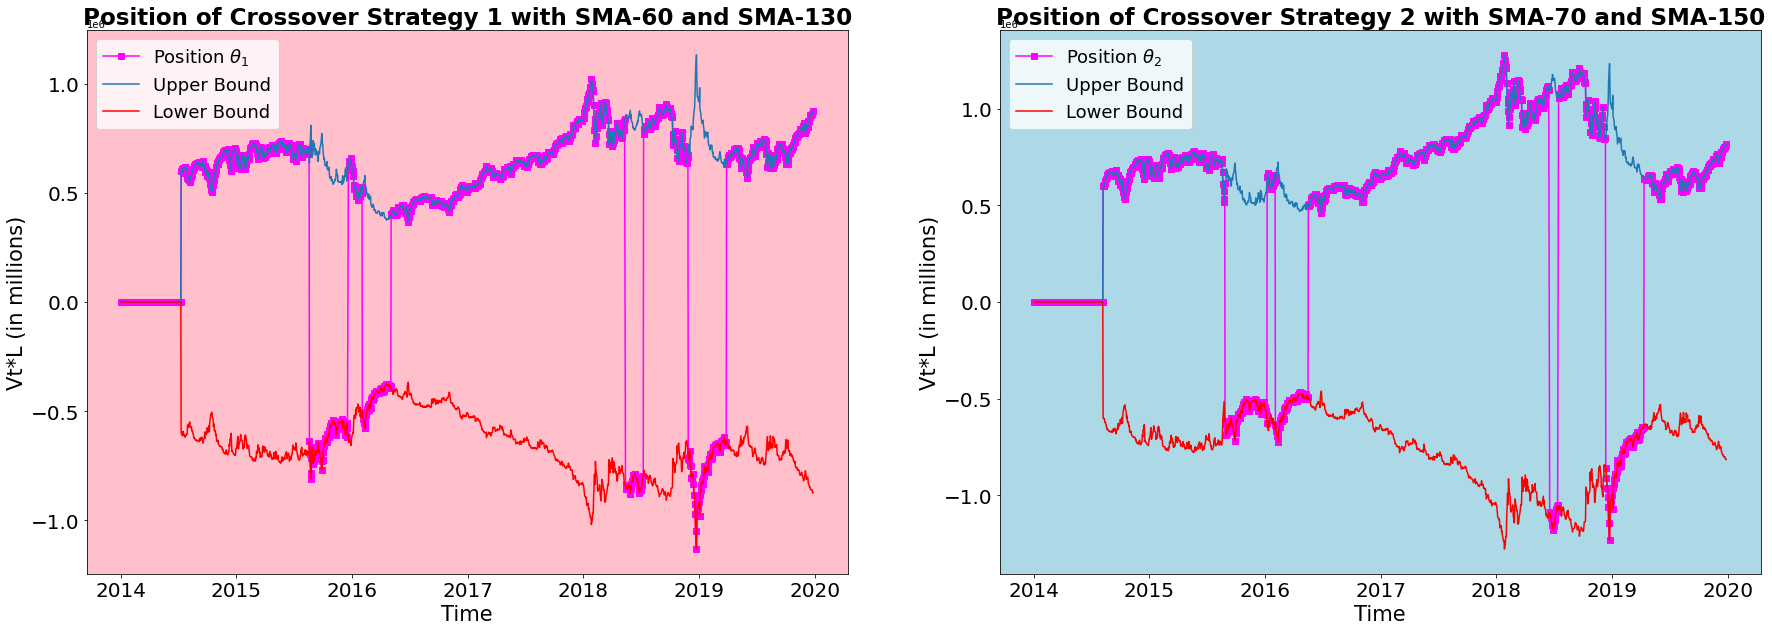

In [134]:
#Plot with upper and lower bounds 

fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ax[0].plot(theta1, marker="s", color="magenta")
ax[0].plot(trading_capital1*L)
ax[0].plot(-trading_capital1*L, color="red")  
ax[0].set_facecolor("pink")
ax[0].set_title('Position of Crossover Strategy 1 with SMA-60 and SMA-130',fontsize=23,weight='bold')
ax[0].legend(["Position $\\theta_1$","Upper Bound","Lower Bound"],fontsize=18)
ax[0].set_xlabel("Time",fontsize=21)
ax[0].set_ylabel("Vt*L (in millions)",fontsize=21)
ax[0].tick_params(axis='both', which='major', labelsize=20)

ax[1].plot(theta2, marker="s", color="magenta")
ax[1].plot(trading_capital2*L)
ax[1].plot(-trading_capital2*L, color="red")  
ax[1].set_facecolor("lightblue")
ax[1].set_title('Position of Crossover Strategy 2 with SMA-70 and SMA-150',fontsize=23,weight='bold')
ax[1].legend(["Position $\\theta_2$","Upper Bound","Lower Bound"],fontsize=18)
ax[1].set_xlabel("Time",fontsize=21)
ax[1].set_ylabel("Vt*L (in millions)",fontsize=21)
ax[1].tick_params(axis='both', which='major', labelsize=20)


#the trades pretty much follow the same buy or short side that's why we don't see much ups and downs through the plots

<br id="4.2">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.2 Turnover Dollars and Turnover Units</a>

In [80]:
print(f"Turnover in Units for Crossover Strategy 1: {sum(unit_turnover1)} ")
print(f"Turnover in Dollars for Crossover Strategy 2: {sum(dollar_turnover1)} ")
print("")
print(f"Turnover in Units for Crossover Strategy 1: {sum(unit_turnover2)} ")
print(f"Turnover in Dollars for Crossover Strategy 2: {sum(dollar_turnover2)} ")
print("")

Turnover in Units for Crossover Strategy 1: 102906.0 
Turnover in Dollars for Crossover Strategy 2: 26650127.93890381 

Turnover in Units for Crossover Strategy 1: 115125.0 
Turnover in Dollars for Crossover Strategy 2: 30344286.160125732 



<br id="4.3">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.3 Daily Trading PnL Plot</a>

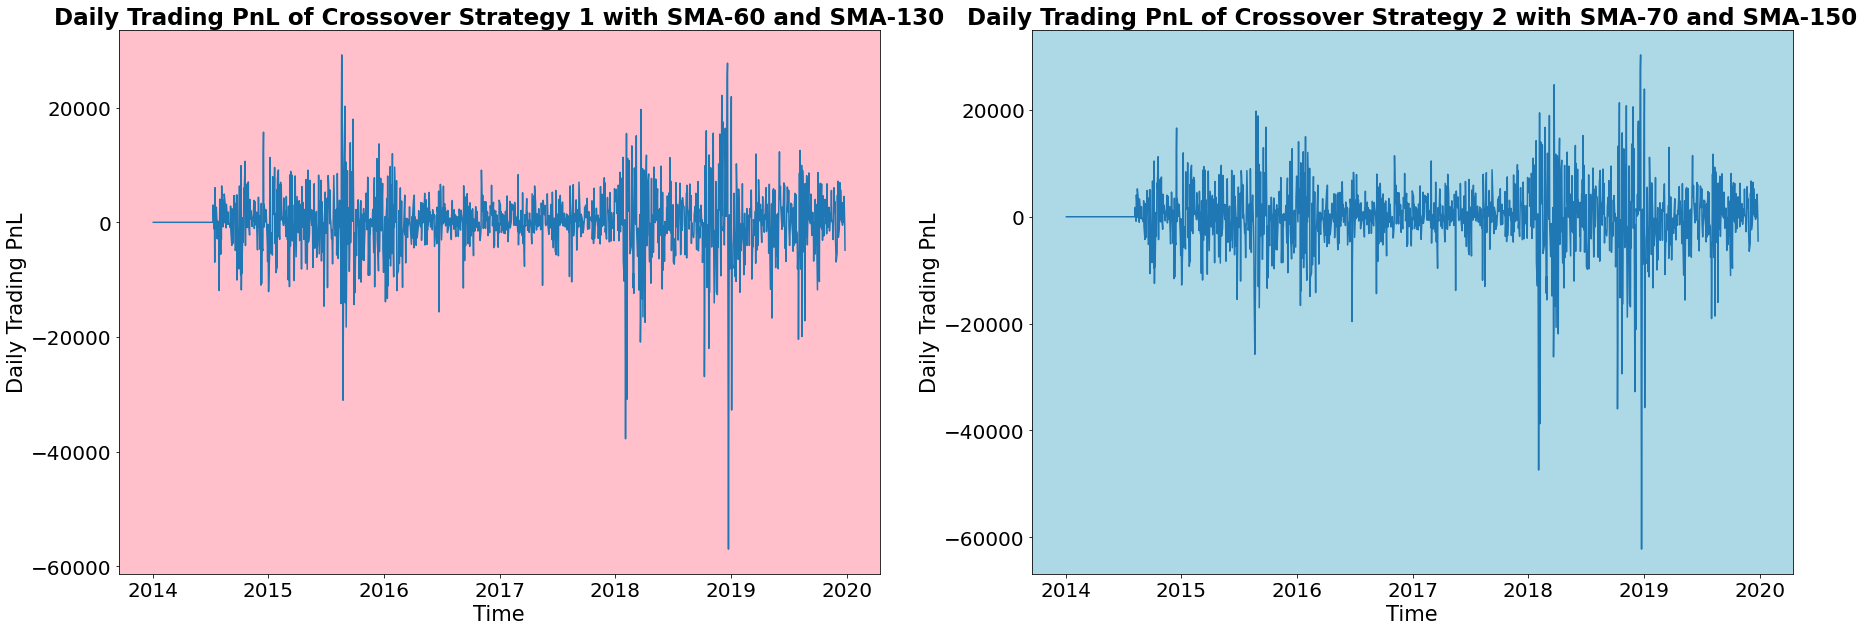

In [128]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ax[0].plot(daily_trad_PnL1)
ax[0].set_facecolor("pink")
ax[0].set_title('Daily Trading PnL of Crossover Strategy 1 with SMA-60 and SMA-130',fontsize=23,weight='bold')
ax[0].set_xlabel("Time",fontsize=21)
ax[0].set_ylabel("Daily Trading PnL",fontsize=21)
ax[0].tick_params(axis='both', which='major', labelsize=20)

ax[1].plot(daily_trad_PnL2)
ax[1].set_facecolor("lightblue")
ax[1].set_title('Daily Trading PnL of Crossover Strategy 2 with SMA-70 and SMA-150',fontsize=23,weight='bold')
ax[1].set_xlabel("Time",fontsize=21)
ax[1].set_ylabel("Daily Trading PnL",fontsize=21)
ax[1].tick_params(axis='both', which='major', labelsize=20)

<br id="4.4">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.4 Cumulative Trading PnL Plot</a>

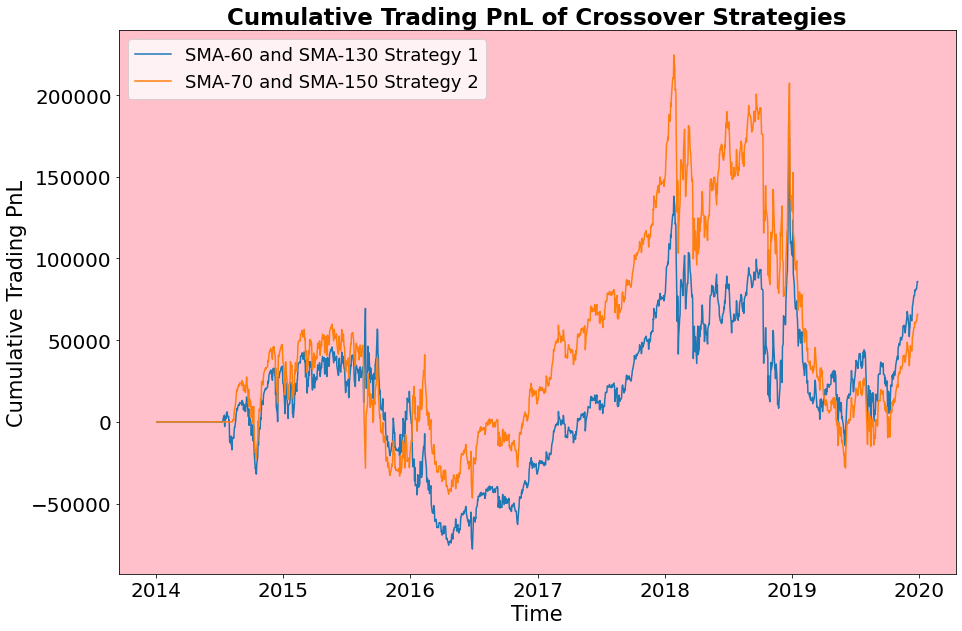

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax.plot(cum_trad_PnL1)
ax.plot(cum_trad_PnL2)
ax.set_facecolor("pink")
ax.set_title('Cumulative Trading PnL of Crossover Strategies',fontsize=23,weight='bold')
ax.set_xlabel("Time",fontsize=21)
ax.set_ylabel("Cumulative Trading PnL",fontsize=21)
ax.legend(["SMA-60 and SMA-130 Strategy 1","SMA-70 and SMA-150 Strategy 2"], fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=20)

plt.show()

<br id="4.5">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.5 Daily Cash Growth Plot</a>

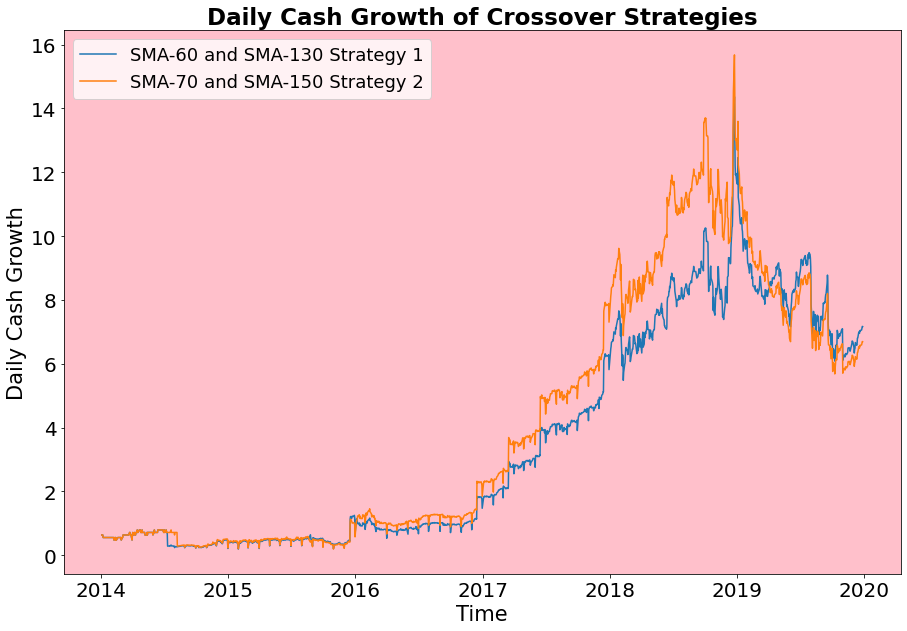

In [130]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax.plot(daily_cash_growth1[:n-1])
ax.plot(daily_cash_growth2[:n-1])
ax.set_facecolor("pink")
ax.set_title('Daily Cash Growth of Crossover Strategies',fontsize=23,weight='bold')
ax.set_xlabel("Time",fontsize=21)
ax.set_ylabel("Daily Cash Growth",fontsize=21)
ax.legend(["SMA-60 and SMA-130 Strategy 1","SMA-70 and SMA-150 Strategy 2"], fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=20)

plt.show()

<br id="4.6">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.6 Cumulative Cash Growth Plot</a>

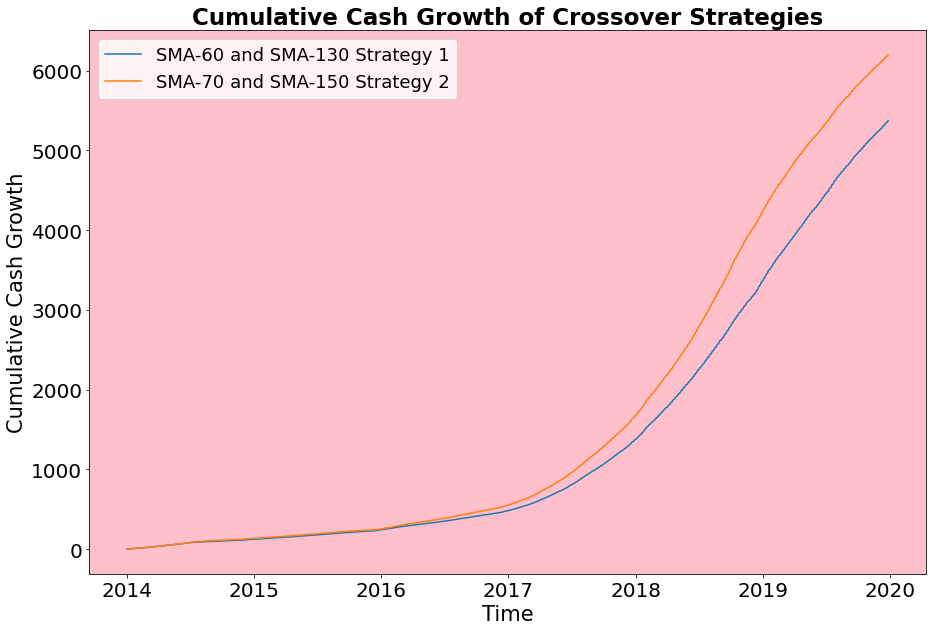

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax.plot(cum_cash_growth1[:n-1])
ax.plot(cum_cash_growth2[:n-1])
ax.set_facecolor("pink")
ax.set_title('Cumulative Cash Growth of Crossover Strategies',fontsize=23,weight='bold')
ax.set_xlabel("Time",fontsize=21)
ax.set_ylabel("Cumulative Cash Growth",fontsize=21)
ax.legend(["SMA-60 and SMA-130 Strategy 1","SMA-70 and SMA-150 Strategy 2"], fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=20)

plt.show()

<br id="4.7">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.7 Daily Total PnL Plot</a>

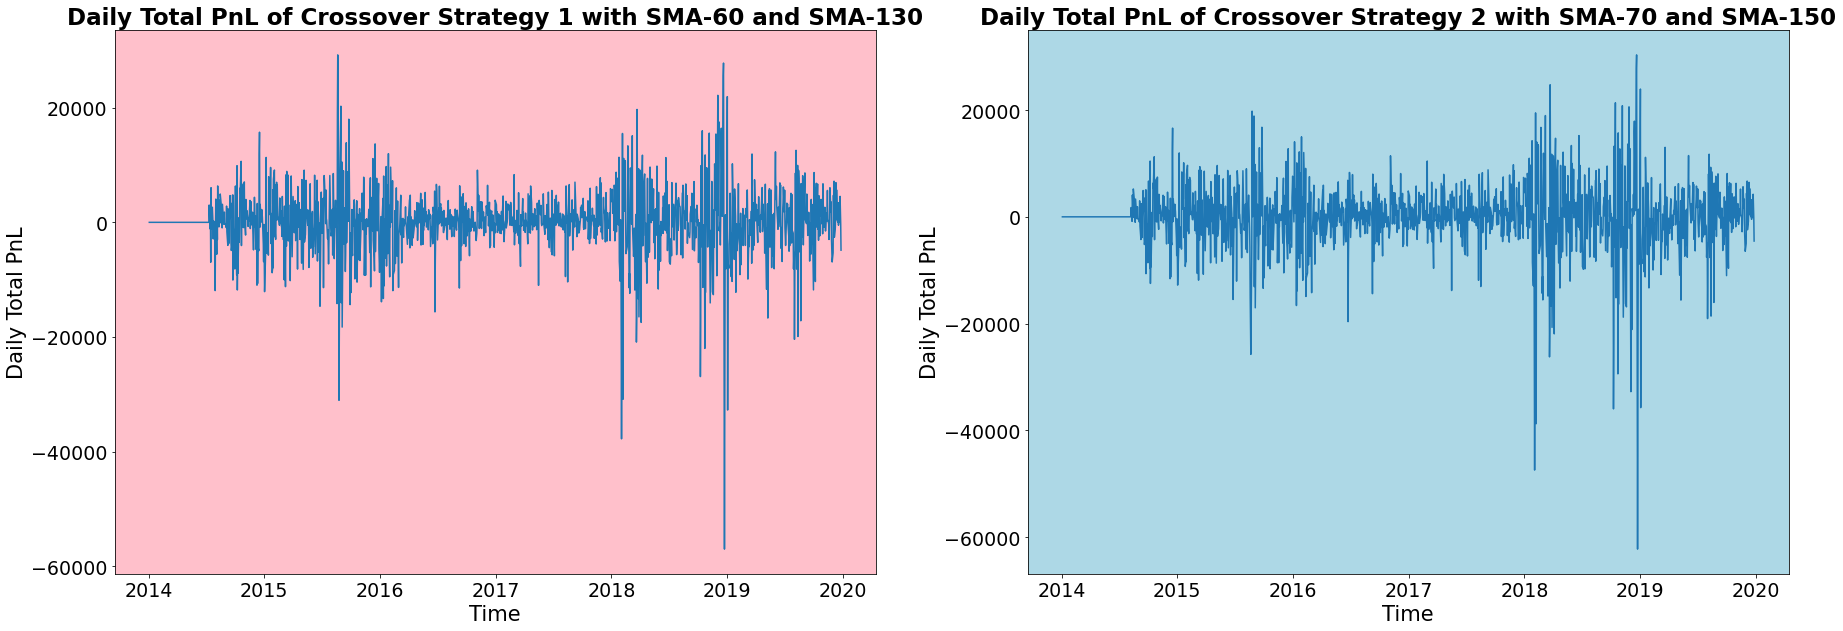

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ax[0].plot(daily_total_PnL1)
ax[0].set_facecolor("pink")
ax[0].set_title('Daily Total PnL of Crossover Strategy 1 with SMA-60 and SMA-130',fontsize=23,weight='bold')
ax[0].set_xlabel("Time",fontsize=21)
ax[0].set_ylabel("Daily Total PnL",fontsize=21)
ax[0].tick_params(axis='both', which='major', labelsize=19)

ax[1].plot(daily_total_PnL2)
ax[1].set_facecolor("lightblue")
ax[1].set_title('Daily Total PnL of Crossover Strategy 2 with SMA-70 and SMA-150',fontsize=23,weight='bold')
ax[1].set_xlabel("Time",fontsize=21)
ax[1].set_ylabel("Daily Total PnL",fontsize=21)
ax[1].tick_params(axis='both', which='major', labelsize=19)

<br id="4.8">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.8 Cumulative Total PnL Plot</a>

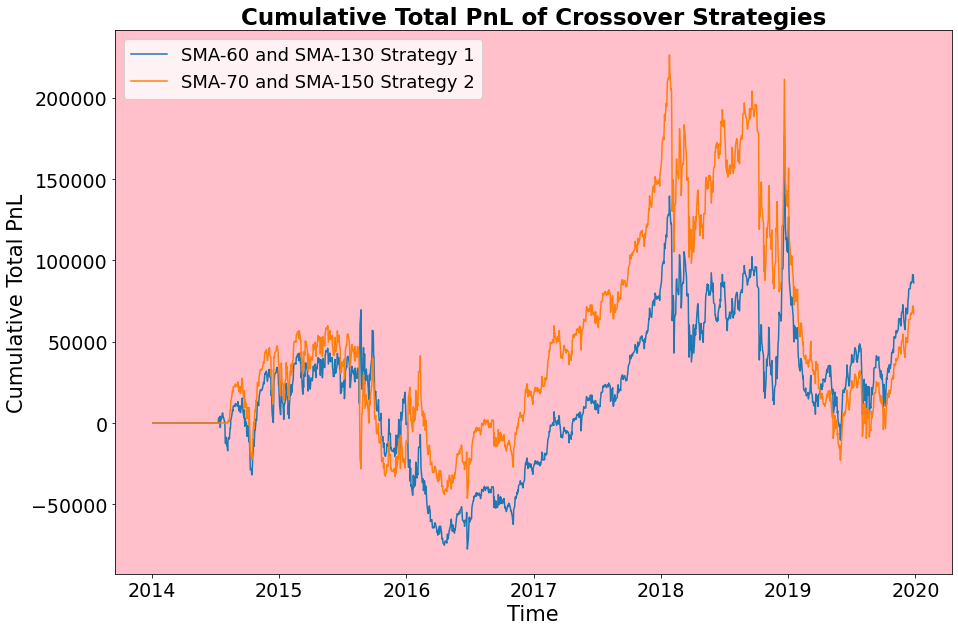

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax.plot(cum_total_PnL1[:n-1])
ax.plot(cum_total_PnL2[:n-1])
ax.set_facecolor("pink")
ax.set_title('Cumulative Total PnL of Crossover Strategies',fontsize=23,weight='bold')
ax.set_xlabel("Time",fontsize=21)
ax.set_ylabel("Cumulative Total PnL",fontsize=21)
ax.legend(["SMA-60 and SMA-130 Strategy 1","SMA-70 and SMA-150 Strategy 2"], fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=19)

plt.show()

- Sharpe Ratio
- Sortino Ratio
- Maximum Drawdown
- Calmar Ratio
- Plot Drawdown Chart and 90-day volatility of underlying asset p_t

#for all strategies collective
- Plot of 3 avg. excess returns with std. with spdr excess return with std.


<br id="4.9">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.9 Sharpe Ratio</a>

In [149]:
# As we don't have any trading PnL for the first 130 and 150 days because of no stock investment within that period for
# Mean reversion strategy 1 and 2 respectively, we think its better to caclulate mean and std dev for the period 
# after that

#the use of sqrt 252 to convert daily to annual Sharpe Ratio
sharpe_ratio1 = (daily_trad_PnL1[130:].mean()/daily_trad_PnL1[130:].std())*np.sqrt(252)
sharpe_ratio2 = (daily_trad_PnL2[150:].mean()/daily_trad_PnL2[150:].std())*np.sqrt(252)

print(f"The Sharpe Ratio for Crossover Strategy 1 is: {sharpe_ratio1}")
print(f"The Sharpe Ratio for Crossover Strategy 2 is: {sharpe_ratio2}")

The Sharpe Ratio for Crossover Strategy 1 is: 0.15749271892526456
The Sharpe Ratio for Crossover Strategy 2 is: 0.10625331474888976


<br id="4.10">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.10 Sortino Ratio</a>

In [150]:
daily_trad_PnL1_ = daily_trad_PnL1[130:]
neg_std1 = daily_trad_PnL1_[daily_trad_PnL1_<0].std()
sortino_ratio1 = (daily_trad_PnL1_.mean()/neg_std1)*np.sqrt(252)

daily_trad_PnL2_ = daily_trad_PnL2[150:]
neg_std2 = daily_trad_PnL2_[daily_trad_PnL2_<0].std()
sortino_ratio2 = (daily_trad_PnL2_.mean()/neg_std2)*np.sqrt(252)

print(f"The Sortino Ratio for Crossover Strategy 1 is: {sortino_ratio1}")
print(f"The Sortino Ratio for Crossover Strategy 2 is: {sortino_ratio2}")

The Sortino Ratio for Crossover Strategy 1 is: 0.1840791189710162
The Sortino Ratio for Crossover Strategy 2 is: 0.12083819030716722


<br id="4.11">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.11 Maximum Drawdown</a>

In [153]:
cum_trad_PnL1_ = cum_trad_PnL1[130:]
max_drawdown1 = (cum_trad_PnL1_.min()-cum_trad_PnL1_.max())/cum_trad_PnL1_.max()

cum_trad_PnL2_ = cum_trad_PnL2[150:]
max_drawdown2 = (cum_trad_PnL2_.min()-cum_trad_PnL2_.max())/cum_trad_PnL2_.max()

print(max_drawdown1,max_drawdown2)

-1.4483146499905895 -1.20736424085408


<br id="4.12">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.12 Calmar Ratio</a>

In [154]:
initial=200000

r1 = daily_trad_PnL1_[130:].mean()/initial 
val1 = initial*((1+r1)**(252))
val1
arr1 = (val1 - initial)/initial
calmar_ratio1_ = arr1/abs(max_drawdown1)
print(calmar_ratio1_)

r2 = daily_trad_PnL2_[150:].mean()/initial
val2 = initial*((1+r2)**(252))
val2
arr2 = (val2 - initial)/initial
calmar_ratio2_ = arr2/abs(max_drawdown2)
print(calmar_ratio2_)

0.05709748809556579
0.015063495390561532


<br id="4.13">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.13 Drawdown Chart and 90-day stock volatility</a>

In [155]:
dd1 = np.zeros(np.shape(price))
dd2 = np.zeros(np.shape(price))

for i in range(n-1):
    dd1[i] = max(daily_trad_PnL1[:i+1]) - daily_trad_PnL1[i]
    dd2[i] = max(daily_trad_PnL2[:i+1]) - daily_trad_PnL2[i]

In [156]:
# Compute 90-day rolling 
rolling_vol = merged_data["Close"].rolling(window = 90).std()

In [157]:
merge = merged_data.copy()
merge["Rolling 90-day volatility"] = rolling_vol
merge["DD1"] = dd1
merge["DD2"] = dd2

In [158]:
dataframe = merge[90:]
dataframe

,Open,High,Low,Close,Adj Close,Volume,spdr_return,effr_rate,excess_return,Theta1,...,Daily_trading_PnL2,Daily_total_PnL2,Total_capital2,Stocks_Purchased2,Cumulative_cash_growth2,Cumulative_trading_PnL2,Cumulative_total_PnL2,Rolling 90-day volatility,DD1,DD2
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-14,189.789993,189.880005,188.789993,189.059998,160.287247,72367000,-0.004738,0.000003,-0.004741,0.000000,...,0.000000,0.635098,200055.721959,0.0,55.721959,0.000000,55.721959,3.453346,0.000000,0.000000
2014-05-15,188.679993,188.720001,186.479996,187.399994,158.879868,154956000,-0.008780,0.000004,-0.008784,0.000000,...,0.000000,0.714487,200056.357056,0.0,56.357056,0.000000,56.357056,3.455257,0.000000,0.000000
2014-05-16,187.509995,188.130005,186.720001,188.050003,159.430984,97458000,0.003469,0.000004,0.003465,0.000000,...,0.000000,0.714490,200057.071543,0.0,57.071543,0.000000,57.071543,3.469319,0.000000,0.000000
2014-05-19,187.690002,188.889999,187.520004,188.740005,160.015945,63839000,0.003669,0.000004,0.003666,0.000000,...,0.000000,0.714492,200057.786033,0.0,57.786033,0.000000,57.786033,3.490535,0.000000,0.000000
2014-05-20,188.649994,188.669998,187.070007,187.550003,159.007050,111644000,-0.006305,0.000004,-0.006309,0.000000,...,0.000000,0.714495,200058.500525,0.0,58.500525,0.000000,58.500525,3.498996,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,321.589996,321.649994,321.059998,321.220001,305.051178,52990000,0.001528,0.000062,0.001466,860227.163269,...,-24.379282,-17.789966,267803.779718,2501.0,6177.112518,61626.667200,67785.275114,9.496059,29235.219589,30336.887351
2019-12-24,321.470001,321.519989,320.899994,321.230011,305.060699,20270000,0.000031,0.000062,-0.000030,860253.969421,...,4225.583150,4232.175016,267785.989753,2500.0,6183.701835,61602.287918,72017.450130,9.576103,24682.670273,26086.924919
2019-12-26,321.649994,322.950012,321.640015,322.940002,306.684540,30911200,0.005323,0.000062,0.005262,873875.646606,...,-252.298050,-245.601750,272018.164769,2526.0,6190.293701,65827.871068,71771.848380,9.730836,29479.391476,30564.806118


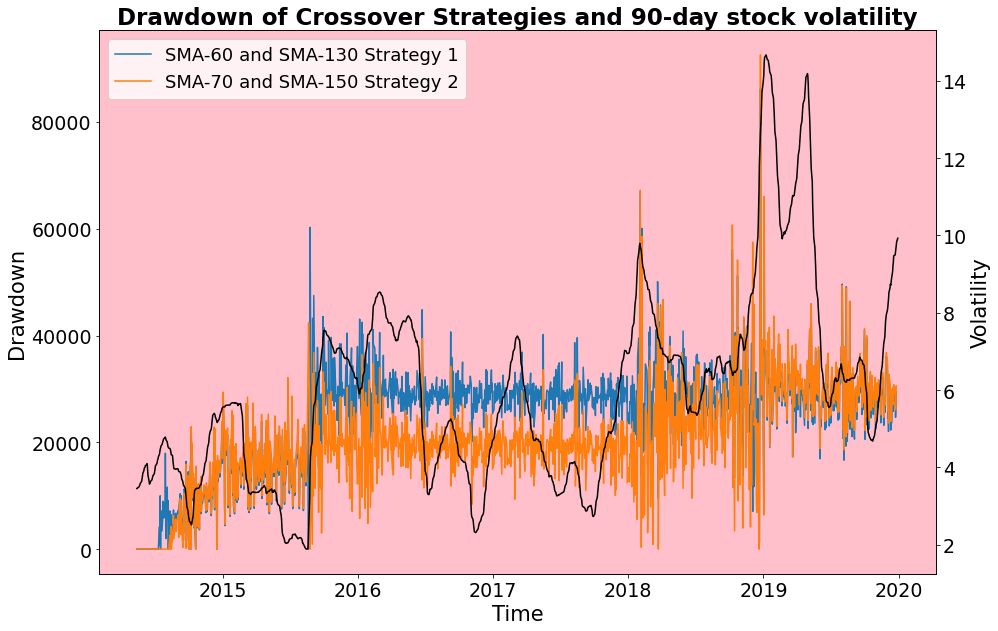

In [173]:
fig, ax1 = plt.subplots(figsize=(15,10))

ax1.plot(dataframe["DD1"][:-2]) #as we have daily_trad_PnL[n-2] as the last value in our strategies
ax1.plot(dataframe["DD2"][:-2])
ax1.set_facecolor("pink")
ax1.set_title('Drawdown of Crossover Strategies and 90-day stock volatility',fontsize=23,weight='bold')
ax1.legend(["SMA-60 and SMA-130 Strategy 1","SMA-70 and SMA-150 Strategy 2"], fontsize=18)
ax1.set_xlabel("Time",fontsize=21)
ax1.set_ylabel("Drawdown",fontsize=21)
ax1.tick_params(axis='both', which='major', labelsize=19)

ax2 = ax1.twinx() 
ax2.plot(dataframe["Rolling 90-day volatility"], color="black", label="90-day volatility")
ax2.set_facecolor("pink")
ax2.set_xlabel("Time",fontsize=21)
ax2.set_ylabel("Volatility",fontsize=21)
ax2.tick_params(axis='both', which='major', labelsize=19)

plt.show()








# fig, ax = plt.subplots(figsize=(15, 10))

# ax.plot(dataframe["DD1"][:-2]) #as we have daily_trad_PnL[n-2] as the last value in our strategies
# ax.plot(dataframe["DD2"][:-2])
# ax.set_facecolor("pink")
# ax.set_title('Drawdown of Crossover Strategies',fontsize=23,weight='bold')
# ax.legend(["SMA-60 and SMA-130 Strategy 1","SMA-70 and SMA-150 Strategy 2"], fontsize=18)
# ax.set_xlabel("Time",fontsize=21)
# ax.set_ylabel("Drawdown",fontsize=21)
# ax.tick_params(axis='both', which='major', labelsize=19)

# plt.show()


<br id="4.14">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.14 Plot of 3 avg. excess returns with std. with spdr excess return with std.</a>

#### The Plot Is Made in "Strategy 1 - Mean Reversion Strategy" file

In [172]:
#WE USE THE RESULTANT VALUES DIRECRLY ON THE PLOT IN STRATEGY 1

# print(f"The mean of the daily trading PnL of Crossover Strategy 1: {daily_trad_PnL1[130:].mean()*252}")
# print(f"The std dev of the daily trading PnL of Crossover Strategy 1: {daily_trad_PnL1[130:].std()*np.sqrt(252)}")

# print(f"The mean of the daily trading PnL of Crossover Strategy 2: {daily_trad_PnL2[150:].mean()*252}")
# print(f"The std dev of the daily trading PnL of Crossover Strategy 2: {daily_trad_PnL2[150:].std()*np.sqrt(252)}")

print(f"The mean of the daily trading PnL of Crossover Strategy 1: {(daily_trad_PnL1[130:]/trading_capital1[130:])[:-1].mean()}")
print(f"The std dev of the daily trading PnL of Crossover Strategy 1: {(daily_trad_PnL1[130:]/trading_capital1[130:])[:-1].std()}")

print(f"The mean of the daily trading PnL of Crossover Strategy 2: {(daily_trad_PnL2[150:]/trading_capital2[150:]).mean()}")
print(f"The std dev of the daily trading PnL of Crossover Strategy 2: {(daily_trad_PnL2[150:]/trading_capital2[150:]).std()}")


The mean of the daily trading PnL of Crossover Strategy 1: 0.0009454269290110083
The std dev of the daily trading PnL of Crossover Strategy 1: 0.04218805922189887
The mean of the daily trading PnL of Crossover Strategy 2: 0.0008704788543653191
The std dev of the daily trading PnL of Crossover Strategy 2: 0.04228722220847169


/var/folders/qs/_ffmzjk16gv43f9ntt_xdyrc0000gn/T/ipykernel_70280/196219466.py:9: RuntimeWarning: invalid value encountered in true_divide
  print(f"The mean of the daily trading PnL of Crossover Strategy 1: {(daily_trad_PnL1[130:]/trading_capital1[130:])[:-1].mean()}")
/var/folders/qs/_ffmzjk16gv43f9ntt_xdyrc0000gn/T/ipykernel_70280/196219466.py:10: RuntimeWarning: invalid value encountered in true_divide
  print(f"The std dev of the daily trading PnL of Crossover Strategy 1: {(daily_trad_PnL1[130:]/trading_capital1[130:])[:-1].std()}")
